In [136]:
data = 'https://raw.githubusercontent.com/gastonstat/CreditScoring/refs/heads/master/CreditScoring.csv'

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [138]:
#!wget -O CreditScoring.csv {data}

In [139]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


# EDA

In [140]:
df.dtypes

Status       int64
Seniority    int64
Home         int64
Time         int64
Age          int64
Marital      int64
Records      int64
Job          int64
Expenses     int64
Income       int64
Assets       int64
Debt         int64
Amount       int64
Price        int64
dtype: object

In [141]:
df.nunique()

Status          3
Seniority      47
Home            7
Time           11
Age            50
Marital         6
Records         2
Job             5
Expenses       94
Income        353
Assets        160
Debt          183
Amount        285
Price        1419
dtype: int64

In [142]:
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [143]:
df.columns = df.columns.str.lower()
df.columns.tolist()

['status',
 'seniority',
 'home',
 'time',
 'age',
 'marital',
 'records',
 'job',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price']

In [144]:
df.describe().round()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,1.0,8.0,3.0,46.0,37.0,2.0,1.0,2.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,0.0,8.0,2.0,15.0,11.0,1.0,0.0,1.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,0.0,0.0,6.0,18.0,0.0,1.0,0.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,1.0,2.0,2.0,36.0,28.0,2.0,1.0,1.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,1.0,5.0,2.0,48.0,36.0,2.0,1.0,1.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,2.0,12.0,4.0,60.0,45.0,2.0,1.0,3.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,2.0,48.0,6.0,72.0,68.0,5.0,2.0,4.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


# Data preparation

In [145]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

In [146]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)


In [147]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)


In [148]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [149]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [150]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [151]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [152]:
# 99999999 is a placeholder for missing values in the 'income','assets' and 'debt' columns

df.income = df.income.replace(99999999, np.nan)
df.assets = df.assets.replace(99999999, np.nan)
df.debt = df.debt.replace(99999999, np.nan)

In [153]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

In [154]:
df.fillna({'income': 0.0,
           'assets': 0.0,
           'debt': 0.0}, inplace=True)

In [155]:
# distribution of the target variable
# just one record is 'unk' so we can ignore it
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [156]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [157]:
df_full_train, df_test, target_full_train, target_test = train_test_split(df.drop('status', axis=1), df.status, test_size=0.2, random_state=42, stratify=df.status)
df_train,df_val, target_train, target_val = train_test_split(df_full_train, target_full_train, test_size=0.25, random_state=42, stratify=target_full_train)

In [158]:
df_train.shape, df_test.shape, df_val.shape

((2672, 13), (891, 13), (891, 13))

In [159]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
target_val = target_val.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

In [160]:
target_train = target_train.replace('ok', 0)
target_train = target_train.replace('default', 1)
target_val = target_val.replace('ok', 0)
target_val = target_val.replace('default', 1)
target_test = target_test.replace('ok', 0)
target_test = target_test.replace('default', 1)

/tmp/ipykernel_1785/3717145335.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_train = target_train.replace('default', 1)
/tmp/ipykernel_1785/3717145335.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target_val = target_val.replace('default', 1)
/tmp/ipykernel_1785/3717145335.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

In [161]:
target_train.value_counts(normalize=True)

status
0    0.718563
1    0.281437
Name: proportion, dtype: float64

In [162]:
df_train.columns.tolist()==df_val.columns.tolist()==df_test.columns.tolist()

True

# 6.3 Decision Trees

In [163]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [164]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [165]:
list(zip(dv.feature_names_, X_train[0]))

[('age', np.float64(23.0)),
 ('amount', np.float64(1200.0)),
 ('assets', np.float64(4000.0)),
 ('debt', np.float64(1000.0)),
 ('expenses', np.float64(45.0)),
 ('home=ignore', np.float64(0.0)),
 ('home=other', np.float64(0.0)),
 ('home=owner', np.float64(1.0)),
 ('home=parents', np.float64(0.0)),
 ('home=private', np.float64(0.0)),
 ('home=rent', np.float64(0.0)),
 ('home=unk', np.float64(0.0)),
 ('income', np.float64(120.0)),
 ('job=fixed', np.float64(1.0)),
 ('job=freelance', np.float64(0.0)),
 ('job=others', np.float64(0.0)),
 ('job=partime', np.float64(0.0)),
 ('job=unk', np.float64(0.0)),
 ('marital=divorced', np.float64(0.0)),
 ('marital=married', np.float64(1.0)),
 ('marital=separated', np.float64(0.0)),
 ('marital=single', np.float64(0.0)),
 ('marital=unk', np.float64(0.0)),
 ('marital=widow', np.float64(0.0)),
 ('price', np.float64(1476.0)),
 ('records=no', np.float64(1.0)),
 ('records=yes', np.float64(0.0)),
 ('seniority', np.float64(0.0)),
 ('time', np.float64(60.0))]

In [166]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, target_train.values)
dt.classes_

array([0, 1])

In [167]:
X_val = dv.transform(df_val.to_dict(orient='records'))
y_pred = dt.predict_proba(X_val)[:, 1]

In [168]:
# validation ROC AUC
roc_auc_score(target_val, y_pred)

0.6202938247011951

In [169]:
# train ROC AUC
y_pred_train = dt.predict_proba(X_train)[:, 1]
roc_auc_score(target_train, y_pred_train)

1.0

In [170]:
dt_1 = DecisionTreeClassifier(max_depth=3)
dt_1 = dt_1.fit(X_train, target_train.values)

In [171]:
y_pred_1 = dt_1.predict_proba(X_val)[:, 1]

In [172]:
# validation ROC AUC
roc_auc_score(target_val.values, y_pred_1)

0.7166085657370519

In [173]:
# train ROC AUC
y_pred_train_1 = dt.predict_proba(X_train)[:, 1]
roc_auc_score(target_train.values, y_pred_train_1)

1.0

In [174]:
max_depths = [2,3,4,5,6,7,8,9,10]
roc_auc_scores_train = []
roc_auc_scores_val = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt = dt.fit(X_train, target_train)
    y_pred_train = dt.predict_proba(X_train)[:, 1]
    y_pred_val = dt.predict_proba(X_val)[:, 1]
    auc_train = roc_auc_score(target_train, y_pred_train)
    auc_val = roc_auc_score(target_val, y_pred_val)
    roc_auc_scores_train.append(auc_train)
    roc_auc_scores_val.append(auc_val)

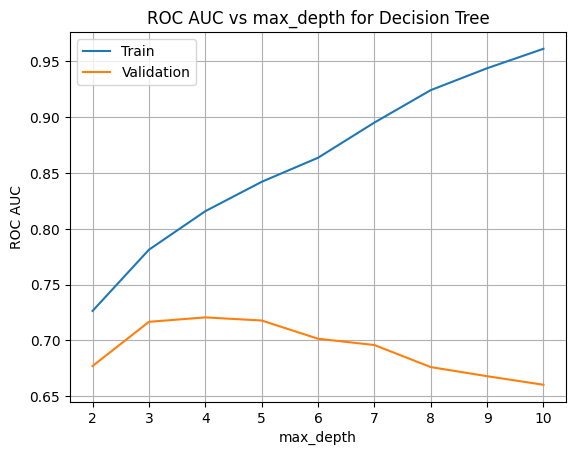

In [175]:
plt.plot(max_depths, roc_auc_scores_train, label='Train')
plt.plot(max_depths, roc_auc_scores_val, label='Validation')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs max_depth for Decision Tree')
plt.grid()
plt.legend()

In [176]:
dt_final = DecisionTreeClassifier(max_depth=4)
dt_final = dt_final.fit(X_train, target_train)

In [177]:
roc_auc_score(target_val, dt_final.predict_proba(X_val)[:, 1])

0.7205832918326693

In [178]:
from sklearn.tree import export_text
r = export_text(dt_final, feature_names=dv.feature_names_)
print(r)

|--- records=yes <= 0.50
|   |--- income <= 95.50
|   |   |--- assets <= 3650.00
|   |   |   |--- job=fixed <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- job=fixed >  0.50
|   |   |   |   |--- class: 0
|   |   |--- assets >  3650.00
|   |   |   |--- seniority <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- seniority >  2.50
|   |   |   |   |--- class: 0
|   |--- income >  95.50
|   |   |--- seniority <= 4.50
|   |   |   |--- expenses <= 78.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  78.00
|   |   |   |   |--- class: 0
|   |   |--- seniority >  4.50
|   |   |   |--- amount <= 1410.00
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  1410.00
|   |   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 2.50
|   |   |--- assets <= 7850.00
|   |   |   |--- amount <= 1325.00
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  1325.00
|   |   |   |   |--- class: 1
|   |   |--- assets >  7850.00
|   |   |   |--- age <= 45.00
|   |  

In [179]:
# ROC AUC on test set
X_test = dv.transform(df_test.to_dict(orient = 'records'))
roc_auc_score(target_test,dt_final.predict_proba(X_test)[:, 1])

0.7781530129482073

# 6.6 - Ensemble Learning and Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,target_train.values)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [182]:
rf.classes_

array([0, 1])

In [183]:
y_pred_rf = rf.predict_proba(X_val)[:,1]
roc_auc_score(target_val,y_pred_rf)

0.802863545816733

In [184]:
scores = []
for n in range(10, 201,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=42)
    rf.fit(X_train,target_train.values)
    y_pred_rf = rf.predict_proba(X_val)[:,1]
    scores.append((roc_auc_score(target_val,y_pred_rf),n))

In [185]:
df_scores = pd.DataFrame(scores,columns=['roc_auc','n_estimators'])
df_scores.head()

,roc_auc,n_estimators
0,0.765955,10
1,0.788888,20
2,0.798817,30
3,0.800822,40
4,0.801142,50


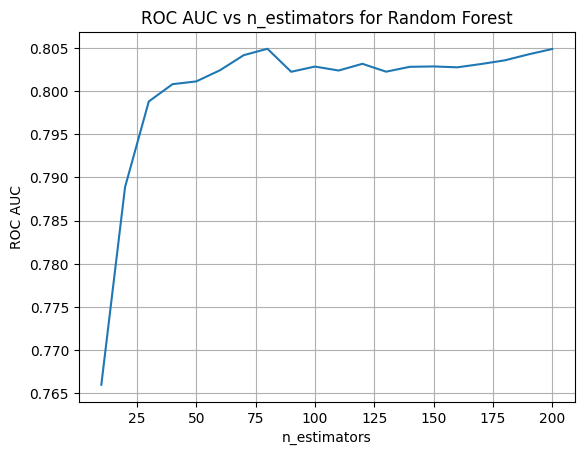

In [186]:
plt.plot(df_scores.n_estimators, df_scores.roc_auc)
plt.xlabel('n_estimators')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs n_estimators for Random Forest')
plt.grid()

In [187]:
# max roc auc and corresponding n_estimators
df_scores.iloc[df_scores.roc_auc.idxmax()]

roc_auc          0.804927
n_estimators    80.000000
Name: 7, dtype: float64

In [230]:
scores = []
#  *********** Takes too much time to train **********
#for d in range(5, 20, 2):
#    for n in range(10, 201,10):
#        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
#        rf.fit(X_train,target_train.values)
#        y_pred_rf = rf.predict_proba(X_val)[:,1]
#        scores.append((roc_auc_score(target_val,y_pred_rf),n,d))

In [189]:
df_scores = pd.DataFrame(scores,columns = ['roc_auc_score','n_estimators','max_depth'])
df_scores

,roc_auc_score,n_estimators,max_depth
0,0.800308,10,5
1,0.799686,20,5
2,0.798540,30,5
3,0.801889,40,5
4,0.802185,50,5
...,...,...,...
155,0.800675,160,19
156,0.800710,170,19
157,0.800461,180,19
158,0.801348,190,19


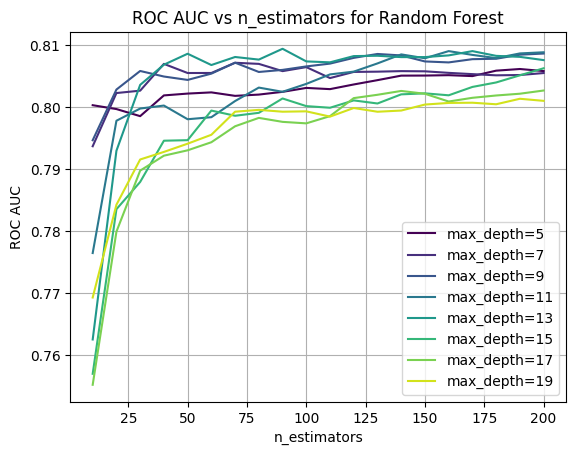

In [190]:
for d in range(5,20,2):
    plt.plot(df_scores[df_scores.max_depth == d].n_estimators,
             df_scores[df_scores.max_depth == d].roc_auc_score,
             label=f'max_depth={d}',color=plt.cm.viridis((d-5)/15))
plt.xlabel('n_estimators')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs n_estimators for Random Forest')
plt.grid()
plt.legend()

In [191]:
# max roc auc and corresponding n_estimators and max_depth
df_scores[df_scores.roc_auc_score==df_scores.roc_auc_score.max()]

,roc_auc_score,n_estimators,max_depth
88,0.809419,90,13


In [192]:
# Final max_depth
max_depth = int(df_scores[df_scores.roc_auc_score==df_scores.roc_auc_score.max()].max_depth.values[0])
n_estimators = int(df_scores[df_scores.roc_auc_score==df_scores.roc_auc_score.max()].n_estimators.values[0])
max_depth, n_estimators

(13, 90)

In [193]:
# let's tune min-samples-leaf
scores = []
for m in range(2,15):
    rf = RandomForestClassifier(n_estimators=90, max_depth=max_depth, min_samples_leaf=m, random_state=42)
    rf.fit(X_train,target_train.values)
    y_pred_rf = rf.predict_proba(X_val)[:,1]
    scores.append((roc_auc_score(target_val,y_pred_rf),m))

In [194]:
df_scores = pd.DataFrame(scores, columns=['roc_auc','min_samples_leaf'])
df_scores

,roc_auc,min_samples_leaf
0,0.803682,2
1,0.806658,3
2,0.805382,4
3,0.805954,5
4,0.809901,6
5,0.806110,7
6,0.803912,8
7,0.806882,9
8,0.805108,10
9,0.807996,11


In [195]:
# max roc auc and corresponding min_samples_leaf
min_samples_leaf = int(df_scores[df_scores.roc_auc==df_scores.roc_auc.max()].min_samples_leaf.values[0])
min_samples_leaf

6

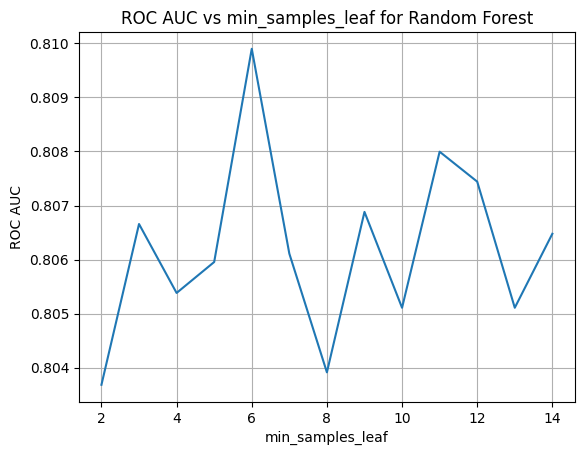

In [196]:
plt.plot(df_scores.min_samples_leaf, df_scores.roc_auc)
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs min_samples_leaf for Random Forest')
plt.grid()

In [197]:
rf_final = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
rf_final.fit(X_train, target_train.values)

,n_estimators,90
,criterion,'gini'
,max_depth,13
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [198]:
y_pred_test = rf_final.predict_proba(X_test)[:,1]
roc_auc_score(target_test, y_pred_test)

0.8496949701195219

# 6.7 - Gradient Boosting

In [199]:
#!pip install xgboost

In [200]:
import xgboost as xgb

In [201]:
dtrain = xgb.DMatrix(X_train, label=target_train.values,feature_names=dv.get_feature_names_out().tolist())
dval = xgb.DMatrix(X_val, label=target_val.values,feature_names=dv.get_feature_names_out().tolist())

In [202]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [203]:
%%capture output
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'eta':0.3,
    'min_child_weight':1,
    'verbosity':1,
    'seed':42,
    'eval_metric':'auc'
}
xgb_model = xgb.train(params,dtrain,num_boost_round=28,evals = watchlist)

In [204]:
def get_df_from_output(output,split=False):
    lines = None
    if not split:
        lines = output.stdout.strip().split('\n')
    else:
        lines = output.strip().split('\n')
    rows = []
    for line in lines:
        num_it,train_auc,val_auc = line.split('\t')
        num_it = int(num_it.replace('[','').replace(']',''))
        train_auc = float(train_auc.split(':')[1])
        val_auc = float(val_auc.split(':')[1])
        rows.append((num_it, train_auc, val_auc))
    df = pd.DataFrame(rows, columns=['num_boost_round', 'train_auc', 'val_auc'])
    return df

In [205]:
df_xgb = get_df_from_output(output)
df_xgb.head()

,num_boost_round,train_auc,val_auc
0,0,0.86588,0.75720
1,1,0.88636,0.77788
2,2,0.89960,0.77815
3,3,0.90857,0.78565
4,4,0.91746,0.78537


In [206]:
df_xgb.describe().round(3)

,num_boost_round,train_auc,val_auc
count,28.000,28.000,28.000
mean,13.500,0.950,0.788
std,8.226,0.031,0.008
min,0.000,0.866,0.757
25%,6.750,0.938,0.786
50%,13.500,0.958,0.790
75%,20.250,0.974,0.793
max,27.000,0.983,0.795


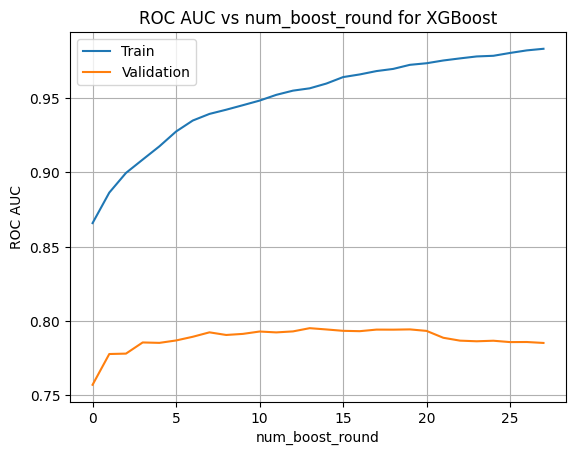

In [207]:
plt.plot(df_xgb.num_boost_round,df_xgb.train_auc, label='Train')
plt.plot(df_xgb.num_boost_round,df_xgb.val_auc, label='Validation')
plt.xlabel('num_boost_round')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs num_boost_round for XGBoost')
plt.grid()
plt.legend()

In [208]:
y_pred_xgb = xgb_model.predict(dval)
roc_auc_score(target_val, y_pred_xgb)

0.785324327689243

### parameter tuning

In [209]:
eta = [1.0, 0.3, 0.1, 0.01]
max_depth = [3, 6, 9]
min_child_weight = [1,3, 5,10]

In [210]:
%%capture output
for i in eta:
    params = {
        'objective':'binary:logistic',
        'max_depth':6,
        'eta':i,
        'min_child_weight':1,
        'verbosity':1,
        'seed':42,
        'eval_metric':'auc'
    }
    xgb_model = xgb.train(params,dtrain,num_boost_round=200,evals = watchlist)
    print('*****')

In [211]:
output_list = output.stdout.strip().split('*****')
df_xgb_full = None
for i in range(4):
    df_xgb = get_df_from_output(output_list[i].strip(), split=True)
    df_xgb['eta'] = eta[i]
    if df_xgb_full is None:
        df_xgb_full = df_xgb
    else:
        df_xgb_full = pd.concat([df_xgb_full, df_xgb])

In [212]:
df_xgb_full.head()

,num_boost_round,train_auc,val_auc,eta
0,0,0.86588,0.75720,1.0
1,1,0.89889,0.75208,1.0
2,2,0.91825,0.75463,1.0
3,3,0.92964,0.75603,1.0
4,4,0.94313,0.75770,1.0


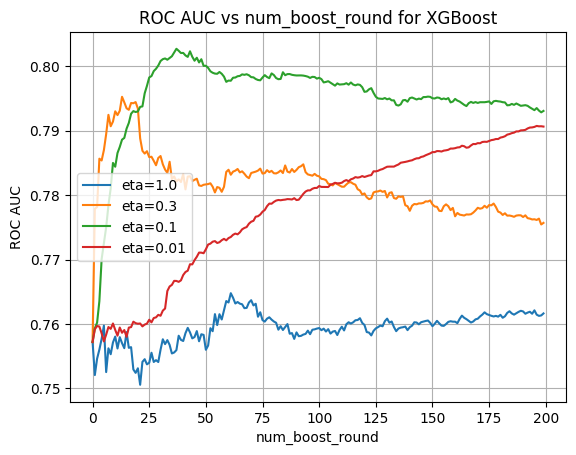

In [213]:
for i in eta:
    df_ = df_xgb_full[df_xgb_full.eta == i]
    plt.plot(df_.num_boost_round,df_.val_auc, label=f'eta={i}')
plt.xlabel('num_boost_round')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs num_boost_round for XGBoost')
plt.grid()
plt.legend()

In [214]:
eta_final = 0.1

In [215]:
%%capture output
for i in max_depth:
    params = {
        'objective':'binary:logistic',
        'max_depth':i,
        'eta':eta_final,
        'min_child_weight':1,
        'verbosity':1,
        'seed':42,
        'eval_metric':'auc'
    }
    xgb_model = xgb.train(params,dtrain,num_boost_round=200,evals = watchlist)
    print('*****')

In [216]:
output_list = output.stdout.strip().split('*****')
df_xgb_full = None
for i in range(len(max_depth)):
    df_xgb = get_df_from_output(output_list[i].strip(), split=True)
    df_xgb['max_depth'] = max_depth[i]
    if df_xgb_full is None:
        df_xgb_full = df_xgb
    else:
        df_xgb_full = pd.concat([df_xgb_full, df_xgb])

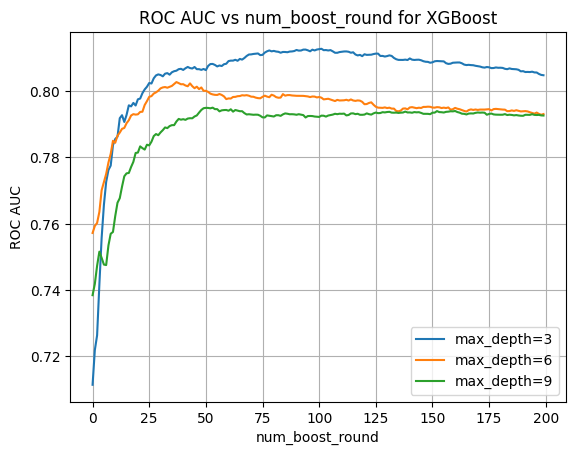

In [217]:
for i in max_depth:
    df_ = df_xgb_full[df_xgb_full.max_depth == i]
    plt.plot(df_.num_boost_round,df_.val_auc, label=f'max_depth={i}')
plt.xlabel('num_boost_round')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs num_boost_round for XGBoost')
plt.grid()
plt.legend()

In [218]:
max_depth_final = int(df_xgb_full[df_xgb_full.val_auc==df_xgb_full.val_auc.max()].max_depth.values[0])
max_depth_final

3

In [219]:
%%capture output
for i in min_child_weight:
    params = {
        'objective':'binary:logistic',
        'max_depth':max_depth_final,
        'eta':eta_final,
        'min_child_weight':i,
        'verbosity':1,
        'seed':42,
        'eval_metric':'auc'
    }
    xgb_model = xgb.train(params,dtrain,num_boost_round=200,evals = watchlist)
    print('*****')

In [220]:
output_list = output.stdout.strip().split('*****')
df_xgb_full = None
for i in range(len(min_child_weight)):
    df_xgb = get_df_from_output(output_list[i].strip(), split=True)
    df_xgb['min_child_weight'] = min_child_weight[i]
    if df_xgb_full is None:
        df_xgb_full = df_xgb
    else:
        df_xgb_full = pd.concat([df_xgb_full, df_xgb])

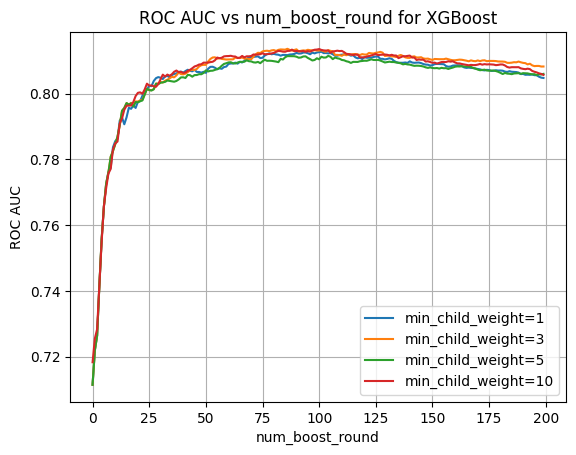

In [221]:
for i in min_child_weight:
    df_ = df_xgb_full[df_xgb_full.min_child_weight == i]
    plt.plot(df_.num_boost_round,df_.val_auc, label=f'min_child_weight={i}')
plt.xlabel('num_boost_round')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs num_boost_round for XGBoost')
plt.grid()
plt.legend()

In [222]:
min_child_weight_final = int(df_xgb_full[df_xgb_full.val_auc==df_xgb_full.val_auc.max()].min_child_weight.values[0])
min_child_weight_final

3

In [223]:
%%capture output
params = {
        'objective':'binary:logistic',
        'max_depth':max_depth_final,
        'eta':eta_final,
        'min_child_weight':min_child_weight_final,
        'verbosity':1,
        'seed':42,
        'eval_metric':'auc'
    }
xgb_model = xgb.train(params,dtrain,num_boost_round=200,evals = watchlist)

In [224]:
df_ = get_df_from_output(output)
df_.head()

,num_boost_round,train_auc,val_auc
0,0,0.78104,0.71142
1,1,0.78791,0.72189
2,2,0.79176,0.72634
3,3,0.80035,0.74167
4,4,0.81253,0.75569


In [225]:
num_boost_round_final = int(df_[df_.val_auc==df_.val_auc.max()].num_boost_round.values[0])
num_boost_round_final

86

In [226]:
params = {
        'objective':'binary:logistic',
        'max_depth':max_depth_final,
        'eta':eta_final,
        'min_child_weight':min_child_weight_final,
        'verbosity':1,
        'seed':42,
        'eval_metric':'auc'
    }
xgb_final = xgb.train(params,dtrain,num_boost_round=num_boost_round_final)

In [227]:
y_pred = xgb_final.predict(dval)    

In [228]:
roc_auc_score(target_val.values, y_pred)

0.8133684013944222

### Testing

In [229]:
dtest = xgb.DMatrix(X_test,label=target_test.values,feature_names=dv.get_feature_names_out().tolist())
y_pred = xgb_final.predict(dtest)
roc_auc_score(target_test.values, y_pred) 

0.8604177041832669